# Udacity - Data Analysis Nanodegree
### Project #4: Wrangle and Analyze data
#### by (Samar Osailan)

In [103]:
import pandas as pd
import numpy as np
import requests
import tweepy
import json
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline
import re
from IPython.display import HTML, display

## Gathering data

In [104]:
#Read WeRateDogs Twitter archive csv
twitter_arch = pd.read_csv('twitter-archive-enhanced.csv')
twitter_arch.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None


In [105]:
#Read image_predictions.tsv file with requests library
link ='https://d17h27t6h515a5.cloudfront.net/topher/2017/August/599fd2ad_image-predictions/image-predictions.tsv'
with open('image_predictions.tsv', 'wb') as file:
        file.write(requests.get(link).content)
image_preds = pd.read_csv('image_predictions.tsv', sep = '\t')
image_preds.head()

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True


In [106]:
import tweepy

consumer_key = 'X'
consumer_secret = 'X'
access_token = 'X'
access_secret = 'X'

auth = tweepy.OAuthHandler(consumer_key, consumer_secret)
auth.set_access_token(access_token, access_secret)

api = tweepy.API(auth)

In [107]:
#Read tweet-json.txt file into a pandas DataFrame with: tweet ID, retweet count, and favorite count
tweets_data = []
with open('tweet-json.txt') as file:
    for i in file:
        tweets = json.loads(i)
        tweets_data.append({'tweet_id': tweets['id'],'retweet_count': tweets['retweet_count'],'favorite_count': tweets['favorite_count']})
tweets_dataframe = pd.DataFrame(tweets_data, columns = ['tweet_id', 'retweet_count', 'favorite_count'])
tweets_dataframe.head()

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048


## Assessing data

In [108]:
twitter_arch

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,None,None,None,None
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,None,None,None,None
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,None,None,None,None
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,None,None,None,None
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2351,666049248165822465,NaN,NaN,2015-11-16 00:24:50 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a 1949 1st generation vulpix. Enj...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666049248...,5,10,None,None,None,None,None
2352,666044226329800704,NaN,NaN,2015-11-16 00:04:52 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a purebred Piers Morgan. Loves to Netf...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666044226...,6,10,a,None,None,None,None
2353,666033412701032449,NaN,NaN,2015-11-15 23:21:54 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here is a very happy pup. Big fan of well-main...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666033412...,9,10,a,None,None,None,None
2354,666029285002620928,NaN,NaN,2015-11-15 23:05:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is a western brown Mitsubishi terrier. Up...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/666029285...,7,10,a,None,None,None,None


In [109]:
twitter_arch.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2356 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2356 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2356 non-null   object 
 4   source                      2356 non-null   object 
 5   text                        2356 non-null   object 
 6   retweeted_status_id         181 non-null    float64
 7   retweeted_status_user_id    181 non-null    float64
 8   retweeted_status_timestamp  181 non-null    object 
 9   expanded_urls               2297 non-null   object 
 10  rating_numerator            2356 non-null   int64  
 11  rating_denominator          2356 non-null   int64  
 12  name                        2356 non-null   object 
 13  doggo                       2356 

In [110]:
twitter_arch.describe()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,retweeted_status_id,retweeted_status_user_id,rating_numerator,rating_denominator
count,2.356000e+03,7.800000e+01,7.800000e+01,1.810000e+02,1.810000e+02,2356.000000,2356.000000
mean,7.427716e+17,7.455079e+17,2.014171e+16,7.720400e+17,1.241698e+16,13.126486,10.455433
std,6.856705e+16,7.582492e+16,1.252797e+17,6.236928e+16,9.599254e+16,45.876648,6.745237
min,6.660209e+17,6.658147e+17,1.185634e+07,6.661041e+17,7.832140e+05,0.000000,0.000000
25%,6.783989e+17,6.757419e+17,3.086374e+08,7.186315e+17,4.196984e+09,10.000000,10.000000
50%,7.196279e+17,7.038708e+17,4.196984e+09,7.804657e+17,4.196984e+09,11.000000,10.000000
75%,7.993373e+17,8.257804e+17,4.196984e+09,8.203146e+17,4.196984e+09,12.000000,10.000000
max,8.924206e+17,8.862664e+17,8.405479e+17,8.874740e+17,7.874618e+17,1776.000000,170.000000


In [111]:
twitter_arch[twitter_arch.in_reply_to_status_id.notnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2038,671550332464455680,6.715449e+17,4.196984e+09,2015-12-01 04:44:10 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After 22 minutes of careful deliberation this ...,NaN,NaN,NaN,NaN,1,10,None,None,None,None,None
2149,669684865554620416,6.693544e+17,4.196984e+09,2015-11-26 01:11:28 +0000,"<a href=""http://twitter.com/download/iphone"" r...",After countless hours of research and hundreds...,NaN,NaN,NaN,NaN,11,10,None,None,None,None,None
2169,669353438988365824,6.678065e+17,4.196984e+09,2015-11-25 03:14:30 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tessa. She is also very pleased after ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/669353438...,10,10,Tessa,None,None,None,None
2189,668967877119254528,6.689207e+17,2.143566e+07,2015-11-24 01:42:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",12/10 good shit Bubka\n@wane15,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None


In [112]:
twitter_arch[twitter_arch.expanded_urls.isnull()]

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo
30,886267009285017600,8.862664e+17,2.281182e+09,2017-07-15 16:51:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@NonWhiteHat @MayhewMayhem omg hello tanner yo...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
55,881633300179243008,8.816070e+17,4.738443e+07,2017-07-02 21:58:53 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@roushfenway These are good dogs but 17/10 is ...,NaN,NaN,NaN,NaN,17,10,None,None,None,None,None
64,879674319642796034,8.795538e+17,3.105441e+09,2017-06-27 12:14:36 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@RealKentMurphy 14/10 confirmed,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
113,870726314365509632,8.707262e+17,1.648776e+07,2017-06-02 19:38:25 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@ComplicitOwl @ShopWeRateDogs &gt;10/10 is res...,NaN,NaN,NaN,NaN,10,10,None,None,None,None,None
148,863427515083354112,8.634256e+17,7.759620e+07,2017-05-13 16:15:35 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Jack_Septic_Eye I'd need a few more pics to p...,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
179,857214891891077121,8.571567e+17,1.806710e+08,2017-04-26 12:48:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@Marc_IRL pixelated af 12/10,NaN,NaN,NaN,NaN,12,10,None,None,None,None,None
185,856330835276025856,NaN,NaN,2017-04-24 02:15:55 +0000,"<a href=""http://twitter.com/download/iphone"" r...",RT @Jenna_Marbles: @dog_rates Thanks for ratin...,8.563302e+17,66699013.0,2017-04-24 02:13:14 +0000,NaN,14,10,None,None,None,None,None
186,856288084350160898,8.562860e+17,2.792810e+08,2017-04-23 23:26:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@xianmcguire @Jenna_Marbles Kardashians wouldn...,NaN,NaN,NaN,NaN,14,10,None,None,None,None,None
188,855862651834028034,8.558616e+17,1.943518e+08,2017-04-22 19:15:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@dhmontgomery We also gave snoop dogg a 420/10...,NaN,NaN,NaN,NaN,420,10,None,None,None,None,None
189,855860136149123072,8.558585e+17,1.361572e+07,2017-04-22 19:05:32 +0000,"<a href=""http://twitter.com/download/iphone"" r...",@s8n You tried very hard to portray this good ...,NaN,NaN,NaN,NaN,666,10,None,None,None,None,None


In [113]:
twitter_arch.name

0        Phineas
1          Tilly
2         Archie
3          Darla
4       Franklin
          ...   
2351        None
2352           a
2353           a
2354           a
2355        None
Name: name, Length: 2356, dtype: object

## ---------------------

In [114]:
image_preds

,tweet_id,jpg_url,img_num,p1,p1_conf,p1_dog,p2,p2_conf,p2_dog,p3,p3_conf,p3_dog
0,666020888022790149,https://pbs.twimg.com/media/CT4udn0WwAA0aMy.jpg,1,Welsh_springer_spaniel,0.465074,True,collie,0.156665,True,Shetland_sheepdog,0.061428,True
1,666029285002620928,https://pbs.twimg.com/media/CT42GRgUYAA5iDo.jpg,1,redbone,0.506826,True,miniature_pinscher,0.074192,True,Rhodesian_ridgeback,0.072010,True
2,666033412701032449,https://pbs.twimg.com/media/CT4521TWwAEvMyu.jpg,1,German_shepherd,0.596461,True,malinois,0.138584,True,bloodhound,0.116197,True
3,666044226329800704,https://pbs.twimg.com/media/CT5Dr8HUEAA-lEu.jpg,1,Rhodesian_ridgeback,0.408143,True,redbone,0.360687,True,miniature_pinscher,0.222752,True
4,666049248165822465,https://pbs.twimg.com/media/CT5IQmsXIAAKY4A.jpg,1,miniature_pinscher,0.560311,True,Rottweiler,0.243682,True,Doberman,0.154629,True
...,...,...,...,...,...,...,...,...,...,...,...,...
2070,891327558926688256,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2,basset,0.555712,True,English_springer,0.225770,True,German_short-haired_pointer,0.175219,True
2071,891689557279858688,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1,paper_towel,0.170278,False,Labrador_retriever,0.168086,True,spatula,0.040836,False
2072,891815181378084864,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1,Chihuahua,0.716012,True,malamute,0.078253,True,kelpie,0.031379,True
2073,892177421306343426,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1,Chihuahua,0.323581,True,Pekinese,0.090647,True,papillon,0.068957,True


In [115]:
image_preds.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2075 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2075 non-null   int64  
 1   jpg_url   2075 non-null   object 
 2   img_num   2075 non-null   int64  
 3   p1        2075 non-null   object 
 4   p1_conf   2075 non-null   float64
 5   p1_dog    2075 non-null   bool   
 6   p2        2075 non-null   object 
 7   p2_conf   2075 non-null   float64
 8   p2_dog    2075 non-null   bool   
 9   p3        2075 non-null   object 
 10  p3_conf   2075 non-null   float64
 11  p3_dog    2075 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 152.1+ KB


In [116]:
image_preds.describe()

,tweet_id,img_num,p1_conf,p2_conf,p3_conf
count,2.075000e+03,2075.000000,2075.000000,2.075000e+03,2.075000e+03
mean,7.384514e+17,1.203855,0.594548,1.345886e-01,6.032417e-02
std,6.785203e+16,0.561875,0.271174,1.006657e-01,5.090593e-02
min,6.660209e+17,1.000000,0.044333,1.011300e-08,1.740170e-10
25%,6.764835e+17,1.000000,0.364412,5.388625e-02,1.622240e-02
50%,7.119988e+17,1.000000,0.588230,1.181810e-01,4.944380e-02
75%,7.932034e+17,1.000000,0.843855,1.955655e-01,9.180755e-02
max,8.924206e+17,4.000000,1.000000,4.880140e-01,2.734190e-01


In [117]:
sum(image_preds.jpg_url.duplicated())

66

In [118]:
tweets_dataframe

,tweet_id,retweet_count,favorite_count
0,892420643555336193,8853,39467
1,892177421306343426,6514,33819
2,891815181378084864,4328,25461
3,891689557279858688,8964,42908
4,891327558926688256,9774,41048
...,...,...,...
2349,666049248165822465,41,111
2350,666044226329800704,147,311
2351,666033412701032449,47,128
2352,666029285002620928,48,132


In [119]:
tweets_dataframe.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2354 entries, 0 to 2353
Data columns (total 3 columns):
 #   Column          Non-Null Count  Dtype
---  ------          --------------  -----
 0   tweet_id        2354 non-null   int64
 1   retweet_count   2354 non-null   int64
 2   favorite_count  2354 non-null   int64
dtypes: int64(3)
memory usage: 55.3 KB


### Quality issues:
#### From the Twitter archive dataset
- There is 181 Retweets.
- There's missing expanded urls which means there's tweets with no images.
- All ID columns need to change datatypes to string rather than integers, because there's no calculations will be performed to them.
- Timestamp column need to be changed to datatime to be displayed approperiately.
- Non-understandable information in source column.
- There will be non-nessecary that need to be deleted
- There's some rows has multiple dog types


#### From the Image predictions dataset
- There will be non-nessecary that need to be deleted
- Delete duplicated jpg_url

### Tidiness issues:
- Merge all datasets to one.
- The last columns of twitter archieve can be merged to one as dog's type.
- Merge rating_numerator and rating_denominator columns to one.

## Cleaning data

In [120]:
#Create a copy of each data that will be cleaned
twitter_arch2=twitter_arch.copy()
image_preds2=image_preds.copy()
tweets_dataframe2=tweets_dataframe.copy()

### There is 181 Retweets
#### Define:
From the information above, I found that the twitter archive dataset has 181 retweets that need to be deleted. Therefore, I will delete every non null values from the retweeted_status_id column.


#### Code:

In [121]:
### Remove retweets
twitter_arch2 = twitter_arch2[twitter_arch2.retweeted_status_id.isnull()]

#### Test:

In [122]:
twitter_arch2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2175 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2175 non-null   int64  
 1   in_reply_to_status_id       78 non-null     float64
 2   in_reply_to_user_id         78 non-null     float64
 3   timestamp                   2175 non-null   object 
 4   source                      2175 non-null   object 
 5   text                        2175 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2175 non-null   int64  
 11  rating_denominator          2175 non-null   int64  
 12  name                        2175 non-null   object 
 13  doggo                       2175 

### There's missing expanded urls which means there's tweets with no images
#### Define:
Delete all rows with a null expanded url because I don't need any tweet without an image included in.


#### Code:

In [123]:
twitter_arch2 = twitter_arch2[twitter_arch2.expanded_urls.notnull()]

#### Test:

In [124]:
twitter_arch2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 17 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2117 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2117 non-null   object 
 4   source                      2117 non-null   object 
 5   text                        2117 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2117 non-null   int64  
 11  rating_denominator          2117 non-null   int64  
 12  name                        2117 non-null   object 
 13  doggo                       2117 

### The last columns can be merged to one as dog's type and fix multiple types
#### Define:
merge the last 4 culomns (doggo, floofer, pupper and puppo) to one titled as dog type, and create new categories to fill multiple types.


#### Code:

In [125]:
# handle none
twitter_arch2.doggo.replace('None', '', inplace=True)
twitter_arch2.floofer.replace('None', '', inplace=True)
twitter_arch2.pupper.replace('None', '', inplace=True)
twitter_arch2.puppo.replace('None', '', inplace=True)

# merge into column
twitter_arch2['dog_type'] = twitter_arch2.doggo + twitter_arch2.floofer + twitter_arch2.pupper + twitter_arch2.puppo

# handle multiple stages
twitter_arch2.loc[twitter_arch2.dog_type == 'doggopupper', 'dog_type'] = 'doggo, pupper'
twitter_arch2.loc[twitter_arch2.dog_type == 'doggopuppo', 'dog_type'] = 'doggo, puppo'
twitter_arch2.loc[twitter_arch2.dog_type == 'doggofloofer', 'dog_type'] = 'doggo, floofer'

# handle missing values
twitter_arch2.loc[twitter_arch2.dog_type == '', 'dog_type'] = np.nan

#### Test:

In [126]:
twitter_arch2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 18 columns):
 #   Column                      Non-Null Count  Dtype  
---  ------                      --------------  -----  
 0   tweet_id                    2117 non-null   int64  
 1   in_reply_to_status_id       23 non-null     float64
 2   in_reply_to_user_id         23 non-null     float64
 3   timestamp                   2117 non-null   object 
 4   source                      2117 non-null   object 
 5   text                        2117 non-null   object 
 6   retweeted_status_id         0 non-null      float64
 7   retweeted_status_user_id    0 non-null      float64
 8   retweeted_status_timestamp  0 non-null      object 
 9   expanded_urls               2117 non-null   object 
 10  rating_numerator            2117 non-null   int64  
 11  rating_denominator          2117 non-null   int64  
 12  name                        2117 non-null   object 
 13  doggo                       2117 

In [127]:
twitter_arch2.dog_type.value_counts()

pupper            222
doggo              72
puppo              23
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_type, dtype: int64

In [128]:
twitter_arch2.head(50)

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,retweeted_status_id,retweeted_status_user_id,retweeted_status_timestamp,expanded_urls,rating_numerator,rating_denominator,name,doggo,floofer,pupper,puppo,dog_type
0,892420643555336193,NaN,NaN,2017-08-01 16:23:56 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Phineas. He's a mystical boy. Only eve...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892420643...,13,10,Phineas,,,,,NaN
1,892177421306343426,NaN,NaN,2017-08-01 00:17:27 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Tilly. She's just checking pup on you....,NaN,NaN,NaN,https://twitter.com/dog_rates/status/892177421...,13,10,Tilly,,,,,NaN
2,891815181378084864,NaN,NaN,2017-07-31 00:18:03 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Archie. He is a rare Norwegian Pouncin...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891815181...,12,10,Archie,,,,,NaN
3,891689557279858688,NaN,NaN,2017-07-30 15:58:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Darla. She commenced a snooze mid meal...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891689557...,13,10,Darla,,,,,NaN
4,891327558926688256,NaN,NaN,2017-07-29 16:00:24 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Franklin. He would like you to stop ca...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891327558...,12,10,Franklin,,,,,NaN
5,891087950875897856,NaN,NaN,2017-07-29 00:08:17 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Here we have a majestic great white breaching ...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/891087950...,13,10,None,,,,,NaN
6,890971913173991426,NaN,NaN,2017-07-28 16:27:12 +0000,"<a href=""http://twitter.com/download/iphone"" r...",Meet Jax. He enjoys ice cream so much he gets ...,NaN,NaN,NaN,"https://gofundme.com/ydvmve-surgery-for-jax,ht...",13,10,Jax,,,,,NaN
7,890729181411237888,NaN,NaN,2017-07-28 00:22:40 +0000,"<a href=""http://twitter.com/download/iphone"" r...",When you watch your owner call another dog a g...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890729181...,13,10,None,,,,,NaN
8,890609185150312448,NaN,NaN,2017-07-27 16:25:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Zoey. She doesn't want to be one of th...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890609185...,13,10,Zoey,,,,,NaN
9,890240255349198849,NaN,NaN,2017-07-26 15:59:51 +0000,"<a href=""http://twitter.com/download/iphone"" r...",This is Cassie. She is a college pup. Studying...,NaN,NaN,NaN,https://twitter.com/dog_rates/status/890240255...,14,10,Cassie,doggo,,,,doggo


### Non-understandable information in source column
#### Define:
Extract the meaningable words from source to be more clear to read.

#### Code

In [129]:
twitter_arch2.source = twitter_arch2.source.apply(lambda x: re.findall(r'>(.*)<',x)[0])

#### Test:

In [130]:
twitter_arch2.source.value_counts()

Twitter for iPhone     1985
Vine - Make a Scene      91
Twitter Web Client       30
TweetDeck                11
Name: source, dtype: int64

In [131]:
twitter_arch2.source

0       Twitter for iPhone
1       Twitter for iPhone
2       Twitter for iPhone
3       Twitter for iPhone
4       Twitter for iPhone
               ...        
2351    Twitter for iPhone
2352    Twitter for iPhone
2353    Twitter for iPhone
2354    Twitter for iPhone
2355    Twitter for iPhone
Name: source, Length: 2117, dtype: object

### Delete non-nessecary columns from twitter archieve dataset
#### Define:
There's some columns that not nessacery to be shown while working on the analysis, so it's better to be dropped from the table.

#### Code:

In [132]:
twitter_arch2 = twitter_arch2.drop(['retweeted_status_id','retweeted_status_user_id','retweeted_status_timestamp','doggo','floofer','pupper','puppo'], axis=1)

#### Test:

In [133]:
twitter_arch2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 11 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2117 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              2117 non-null   object 
 4   source                 2117 non-null   object 
 5   text                   2117 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   rating_numerator       2117 non-null   int64  
 8   rating_denominator     2117 non-null   int64  
 9   name                   2117 non-null   object 
 10  dog_type               338 non-null    object 
dtypes: float64(2), int64(3), object(6)
memory usage: 198.5+ KB


### Delete duplicated jpg_url
#### Define:
There's some duplicated values in jpg_url column that need to be deleted.

#### Code:

In [134]:
image_preds2 = image_preds2.drop_duplicates(subset=['jpg_url'], keep='last')

#### Test:

In [135]:
sum(image_preds2.jpg_url.duplicated())

0

In [136]:
image_preds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 12 columns):
 #   Column    Non-Null Count  Dtype  
---  ------    --------------  -----  
 0   tweet_id  2009 non-null   int64  
 1   jpg_url   2009 non-null   object 
 2   img_num   2009 non-null   int64  
 3   p1        2009 non-null   object 
 4   p1_conf   2009 non-null   float64
 5   p1_dog    2009 non-null   bool   
 6   p2        2009 non-null   object 
 7   p2_conf   2009 non-null   float64
 8   p2_dog    2009 non-null   bool   
 9   p3        2009 non-null   object 
 10  p3_conf   2009 non-null   float64
 11  p3_dog    2009 non-null   bool   
dtypes: bool(3), float64(3), int64(2), object(4)
memory usage: 162.8+ KB


### Delete non-nessecary columns from image predictions dataset
#### Define:
There's some columns that not nessacery to be shown while working on the analysis, so it's better to be dropped from the table.

#### Code:

In [137]:
image_preds2 = image_preds2.drop(['p1','p1_conf','p1_dog', 'p2', 'p2_conf','p2_dog','p3', 'p3_conf', 'p3_dog'], axis=1)

#### Test:

In [138]:
image_preds2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2009 entries, 0 to 2074
Data columns (total 3 columns):
 #   Column    Non-Null Count  Dtype 
---  ------    --------------  ----- 
 0   tweet_id  2009 non-null   int64 
 1   jpg_url   2009 non-null   object
 2   img_num   2009 non-null   int64 
dtypes: int64(2), object(1)
memory usage: 62.8+ KB


### Merge rating_numerator and rating_denominator columns to one.
#### Define:
merge the two columns by dividing the numerator by the denominator to get a float number as the rate.


#### Code:

In [139]:
twitter_arch2['rate']=twitter_arch2.rating_numerator/twitter_arch2.rating_denominator

In [140]:
twitter_arch2 = twitter_arch2.drop(['rating_numerator','rating_denominator'], axis=1)

#### Test:

In [141]:
twitter_arch2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2355
Data columns (total 10 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2117 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              2117 non-null   object 
 4   source                 2117 non-null   object 
 5   text                   2117 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   name                   2117 non-null   object 
 8   dog_type               338 non-null    object 
 9   rate                   2117 non-null   float64
dtypes: float64(3), int64(1), object(6)
memory usage: 181.9+ KB


### Merge all datasets to one
#### Define:
All datasets have to be in one, so I will merge all of them together.

#### Code:



In [142]:
twitter_arch2 = pd.merge(twitter_arch2, image_preds2, on = ['tweet_id'], how = 'left')

In [143]:
twitter_arch2 = pd.merge(twitter_arch2, tweets_dataframe2, on = ['tweet_id'], how = 'left')

#### Test:

In [144]:
twitter_arch2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2117 non-null   int64  
 1   in_reply_to_status_id  23 non-null     float64
 2   in_reply_to_user_id    23 non-null     float64
 3   timestamp              2117 non-null   object 
 4   source                 2117 non-null   object 
 5   text                   2117 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   name                   2117 non-null   object 
 8   dog_type               338 non-null    object 
 9   rate                   2117 non-null   float64
 10  jpg_url                1928 non-null   object 
 11  img_num                1928 non-null   float64
 12  retweet_count          2117 non-null   int64  
 13  favorite_count         2117 non-null   int64  
dtypes: float64(4), int64(3), object(7)
memory usage: 248.1+ 

### Wrong datatypes of some columns
#### Define:
Change the data types of 
tweet_id column: integer -> string
in_reply_to_status_id column: float -> string
in_reply_to_user_id column: float -> string
timestamp column: object -> datetime

#### Code:

In [145]:
twitter_arch2.tweet_id = str(twitter_arch2.tweet_id)
twitter_arch2.in_reply_to_status_id = str(twitter_arch2.in_reply_to_status_id)
twitter_arch2.in_reply_to_user_id = str(twitter_arch2.in_reply_to_user_id)

# change timestamp to datetime
twitter_arch2.timestamp = pd.to_datetime(twitter_arch2.timestamp)

#### Test:

In [146]:
twitter_arch2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 2117 entries, 0 to 2116
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype              
---  ------                 --------------  -----              
 0   tweet_id               2117 non-null   object             
 1   in_reply_to_status_id  2117 non-null   object             
 2   in_reply_to_user_id    2117 non-null   object             
 3   timestamp              2117 non-null   datetime64[ns, UTC]
 4   source                 2117 non-null   object             
 5   text                   2117 non-null   object             
 6   expanded_urls          2117 non-null   object             
 7   name                   2117 non-null   object             
 8   dog_type               338 non-null    object             
 9   rate                   2117 non-null   float64            
 10  jpg_url                1928 non-null   object             
 11  img_num                1928 non-null   float64          

## Storing data
I will store the cleaned data to a csv file so I can work with it to be analyzed.

In [147]:
twitter_arch2.to_csv('twitter_archive_master.csv', index=False)

## Analyzing data

In [148]:
df = pd.read_csv('twitter_archive_master.csv')
df.head()

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,dog_type,rate,jpg_url,img_num,retweet_count,favorite_count
0,0 892420643555336193\n1 8921774213...,0 NaN\n1 NaN\n2 NaN\n3 NaN...,0 NaN\n1 NaN\n2 NaN\n3 NaN...,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,8853,39467
1,0 892420643555336193\n1 8921774213...,0 NaN\n1 NaN\n2 NaN\n3 NaN...,0 NaN\n1 NaN\n2 NaN\n3 NaN...,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,6514,33819
2,0 892420643555336193\n1 8921774213...,0 NaN\n1 NaN\n2 NaN\n3 NaN...,0 NaN\n1 NaN\n2 NaN\n3 NaN...,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,4328,25461
3,0 892420643555336193\n1 8921774213...,0 NaN\n1 NaN\n2 NaN\n3 NaN...,0 NaN\n1 NaN\n2 NaN\n3 NaN...,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,8964,42908
4,0 892420643555336193\n1 8921774213...,0 NaN\n1 NaN\n2 NaN\n3 NaN...,0 NaN\n1 NaN\n2 NaN\n3 NaN...,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,9774,41048


In [149]:
df.info()
df.head()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2117 entries, 0 to 2116
Data columns (total 14 columns):
 #   Column                 Non-Null Count  Dtype  
---  ------                 --------------  -----  
 0   tweet_id               2117 non-null   object 
 1   in_reply_to_status_id  2117 non-null   object 
 2   in_reply_to_user_id    2117 non-null   object 
 3   timestamp              2117 non-null   object 
 4   source                 2117 non-null   object 
 5   text                   2117 non-null   object 
 6   expanded_urls          2117 non-null   object 
 7   name                   2117 non-null   object 
 8   dog_type               338 non-null    object 
 9   rate                   2117 non-null   float64
 10  jpg_url                1928 non-null   object 
 11  img_num                1928 non-null   float64
 12  retweet_count          2117 non-null   int64  
 13  favorite_count         2117 non-null   int64  
dtypes: float64(2), int64(2), object(10)
memory usage: 231.7+

,tweet_id,in_reply_to_status_id,in_reply_to_user_id,timestamp,source,text,expanded_urls,name,dog_type,rate,jpg_url,img_num,retweet_count,favorite_count
0,0 892420643555336193\n1 8921774213...,0 NaN\n1 NaN\n2 NaN\n3 NaN...,0 NaN\n1 NaN\n2 NaN\n3 NaN...,2017-08-01 16:23:56+00:00,Twitter for iPhone,This is Phineas. He's a mystical boy. Only eve...,https://twitter.com/dog_rates/status/892420643...,Phineas,NaN,1.3,https://pbs.twimg.com/media/DGKD1-bXoAAIAUK.jpg,1.0,8853,39467
1,0 892420643555336193\n1 8921774213...,0 NaN\n1 NaN\n2 NaN\n3 NaN...,0 NaN\n1 NaN\n2 NaN\n3 NaN...,2017-08-01 00:17:27+00:00,Twitter for iPhone,This is Tilly. She's just checking pup on you....,https://twitter.com/dog_rates/status/892177421...,Tilly,NaN,1.3,https://pbs.twimg.com/media/DGGmoV4XsAAUL6n.jpg,1.0,6514,33819
2,0 892420643555336193\n1 8921774213...,0 NaN\n1 NaN\n2 NaN\n3 NaN...,0 NaN\n1 NaN\n2 NaN\n3 NaN...,2017-07-31 00:18:03+00:00,Twitter for iPhone,This is Archie. He is a rare Norwegian Pouncin...,https://twitter.com/dog_rates/status/891815181...,Archie,NaN,1.2,https://pbs.twimg.com/media/DGBdLU1WsAANxJ9.jpg,1.0,4328,25461
3,0 892420643555336193\n1 8921774213...,0 NaN\n1 NaN\n2 NaN\n3 NaN...,0 NaN\n1 NaN\n2 NaN\n3 NaN...,2017-07-30 15:58:51+00:00,Twitter for iPhone,This is Darla. She commenced a snooze mid meal...,https://twitter.com/dog_rates/status/891689557...,Darla,NaN,1.3,https://pbs.twimg.com/media/DF_q7IAWsAEuuN8.jpg,1.0,8964,42908
4,0 892420643555336193\n1 8921774213...,0 NaN\n1 NaN\n2 NaN\n3 NaN...,0 NaN\n1 NaN\n2 NaN\n3 NaN...,2017-07-29 16:00:24+00:00,Twitter for iPhone,This is Franklin. He would like you to stop ca...,https://twitter.com/dog_rates/status/891327558...,Franklin,NaN,1.2,https://pbs.twimg.com/media/DF6hr6BUMAAzZgT.jpg,2.0,9774,41048


#### Dogs rates, likes and retweets visualisations

In [150]:
# Show which dog pic has the highest rate
df.loc[df['rate'].idxmax()]

tweet_id                 0       892420643555336193\n1       8921774213...
in_reply_to_status_id    0      NaN\n1      NaN\n2      NaN\n3      NaN...
in_reply_to_user_id      0      NaN\n1      NaN\n2      NaN\n3      NaN...
timestamp                                        2016-07-04 15:00:45+00:00
source                                                           TweetDeck
text                     This is Atticus. He's quite simply America af....
expanded_urls            https://twitter.com/dog_rates/status/749981277...
name                                                               Atticus
dog_type                                                               NaN
rate                                                                 177.6
jpg_url                    https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg
img_num                                                                  1
retweet_count                                                         2772
favorite_count           

In [151]:
display(HTML('<img src="https://pbs.twimg.com/media/CmgBZ7kWcAAlzFD.jpg"/>'))

In [152]:
# Show which dog pic got the highest likes
df.loc[df['favorite_count'].idxmax()]

tweet_id                 0       892420643555336193\n1       8921774213...
in_reply_to_status_id    0      NaN\n1      NaN\n2      NaN\n3      NaN...
in_reply_to_user_id      0      NaN\n1      NaN\n2      NaN\n3      NaN...
timestamp                                        2017-01-21 18:26:02+00:00
source                                                  Twitter for iPhone
text                     Here's a super supportive puppo participating ...
expanded_urls            https://twitter.com/dog_rates/status/822872901...
name                                                                  None
dog_type                                                             puppo
rate                                                                   1.3
jpg_url                    https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg
img_num                                                                  1
retweet_count                                                        48265
favorite_count           

In [153]:
display(HTML('<img src="https://pbs.twimg.com/media/C2tugXLXgAArJO4.jpg"/>'))

In [154]:
# Show which dog pic has the highest retweets
df.loc[df['retweet_count'].idxmax()]

tweet_id                 0       892420643555336193\n1       8921774213...
in_reply_to_status_id    0      NaN\n1      NaN\n2      NaN\n3      NaN...
in_reply_to_user_id      0      NaN\n1      NaN\n2      NaN\n3      NaN...
timestamp                                        2016-06-18 18:26:18+00:00
source                                                  Twitter for iPhone
text                     Here's a doggo realizing you can stand in a po...
expanded_urls            https://twitter.com/dog_rates/status/744234799...
name                                                                  None
dog_type                                                             doggo
rate                                                                   1.3
jpg_url                  https://pbs.twimg.com/ext_tw_video_thumb/74423...
img_num                                                                  1
retweet_count                                                        79515
favorite_count           

In [155]:
df.loc[df['retweet_count'].idxmax()].jpg_url

'https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg'

In [156]:
display(HTML('<img src="https://pbs.twimg.com/ext_tw_video_thumb/744234667679821824/pu/img/1GaWmtJtdqzZV7jy.jpg"/>'))

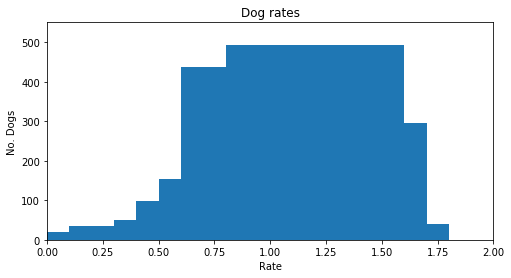

In [157]:
plt.figure(figsize=[8, 4])
plt.bar(x = df.rate.value_counts().keys(), height = df.rate.value_counts())
plt.title('Dog rates')
plt.xlabel('Rate')
plt.ylabel('No. Dogs')
plt.axis([0,2,0,550])
plt.show()

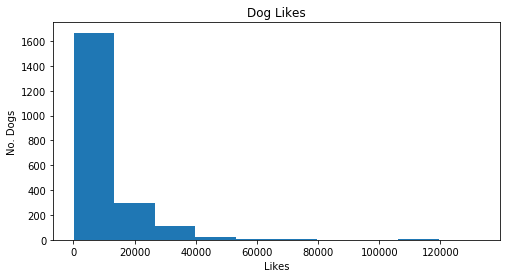

In [158]:
plt.figure(figsize=[8, 4])
plt.hist(data = df, x = 'favorite_count')
plt.title('Dog Likes')
plt.xlabel('Likes')
plt.ylabel('No. Dogs')
plt.show()

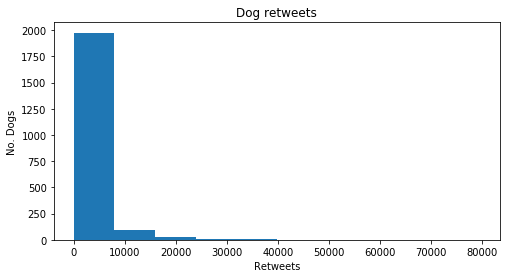

In [159]:
plt.figure(figsize=[8, 4])
plt.hist(data = df, x = 'retweet_count')
plt.title('Dog retweets')
plt.xlabel('Retweets')
plt.ylabel('No. Dogs')
plt.show()

#### Dogs types insight and visualisation

In [160]:
df.dog_type.value_counts()

pupper            222
doggo              72
puppo              23
doggo, pupper      10
floofer             9
doggo, floofer      1
doggo, puppo        1
Name: dog_type, dtype: int64

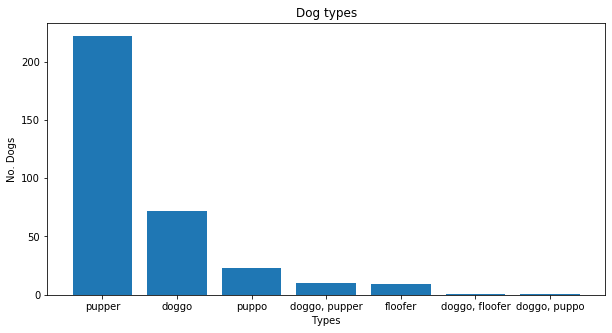

In [163]:
plt.figure(figsize=[10, 5])
plt.bar(x = df.dog_type.value_counts().keys(), height = df.dog_type.value_counts() )
plt.title('Dog types')
plt.xlabel('Types')
plt.ylabel('No. Dogs')
plt.show()